In [1]:
include("../src/ControlToolbox.jl"); # nécessaire tant que pas un vrai package
import .ControlToolbox: plot , plot! # nécessaire tant que include et using relatif
using .ControlToolbox
using Plots

In [2]:
# ocp description
t0 = 0.0                # t0 is fixed
tf = 1.0                # tf is fixed
x0 = [-1.0; 0.0]        # the initial condition is fixed
xf = [ 0.0; 0.0]        # the target
A  = [0.0 1.0
      0.0 0.0]
B  = [0.0; 1.0]
dy(x, u) = A*x+B*u[1];  # dynamics
co(x, u) = 0.5*u[1]^2   # integrand of the Lagrange cost
cf(x) = x-xf            # final condition

# ocp definition
ocp = OCP(  :autonomous,
            control_dimension=1,
            Lagrange_cost=co, 
            dynamics=dy, 
            initial_time=t0, 
            initial_condition=x0, 
            final_time=tf, 
            final_constraint=cf)

# ocp print
print(ocp)

# ocp solution
N  = 1001
U⁺ = range(6.0, stop=-6.0, length=N) # solution
U⁺ = U⁺[1:end-1];

Optimal control problem of the form:

 minimize  J(x, u) = ∫ L(x(t), u(t)) dt, over [t0, tf]

 subject to

     ẋ(t) = f(x(t), u(t)), t in [t0, tf] a.e.,

     c(x(tf)) = 0,

 where x(t) ∈ R^2, u(t) ∈ R and c(x) ∈ R^p.

 Besides, t0, tf and x0 are fixed. 



In [4]:
# initial iterate
U_init = U⁺-1e0*ones(N-1); U_init = [ [U_init[i]] for i=1:N-1 ]

# resolution
ocp_sol = solve(ocp, :bfgs, init=U_init, grid_size=N);

Method = (:descent, :bfgs, :backtracking)



     Calls  ‖∇f(x)‖         ‖x‖             Stagnation      



         1  2.31422989e+02  1.16553013e+02  1.97352739e-02
         2

  8.46009705e-01  1.10656299e+02  7.65300579e-03


         3  2.91099258e-01  1.09815217e+02  3.99177140e-03
         4

  4.41771058e-05  1.09380457e+02  9.68274892e-08


         5  4.40908873e-05  1.09380457e+02  1.88897371e-10



Descent solver result:
   iterations: 5
   stopping: the step length became too small
   convergence: true


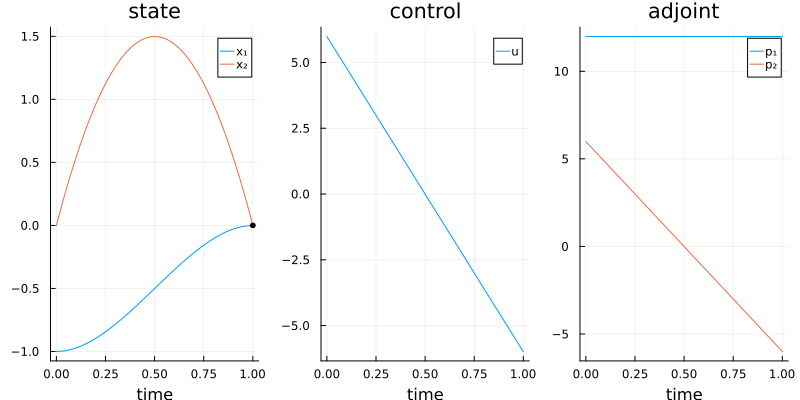

In [5]:
# plot solution
ps = plot(ocp_sol, size=(800, 400))

# plot target
point_style = (color=:black, seriestype=:scatter, markersize=3, markerstrokewidth=0, label="")
plot!(ps[1], [tf], [xf[1]]; point_style...)
plot!(ps[1], [tf], [xf[2]]; point_style...)